# Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.cluster import KMeans

# Data

In [16]:
# Load data
df = pd.read_csv('data/HW3-Data-V3.csv')
df

,X,Y,class
0,1,15,0
1,2,10,1
2,2,11,1
3,2,15,1
4,3,12,0
...,...,...,...
199,112,14,0
200,112,77,1
201,113,78,1
202,114,75,1


In [17]:
# Describe data
print(df.describe())

                X           Y       class
count  204.000000  204.000000  204.000000
mean    55.240196   54.308824    0.524510
std     35.687425   35.433803    0.500627
min      1.000000    1.000000    0.000000
25%     20.500000   14.000000    0.000000
50%     52.000000   61.000000    1.000000
75%     86.250000   89.000000    1.000000
max    115.000000  110.000000    1.000000


204 samples of binary class [0,1] in 2D space.

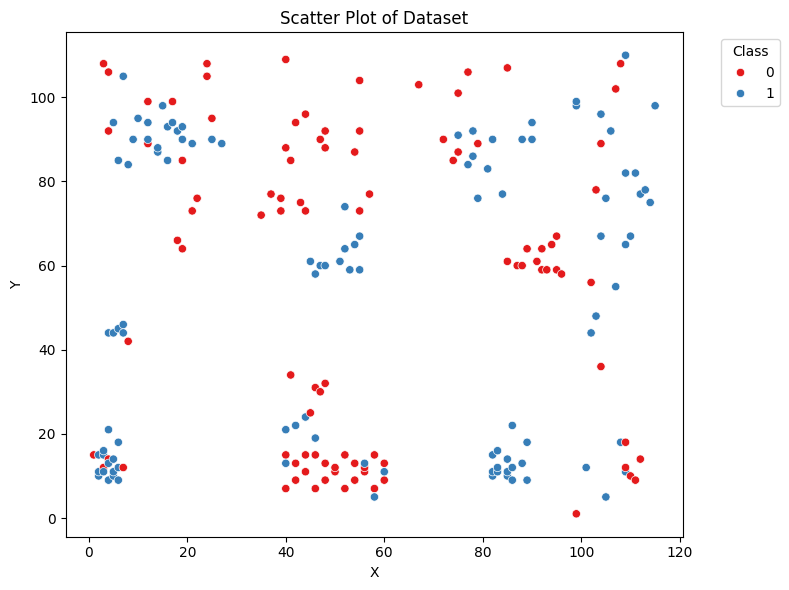

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='X', y='Y', hue='class', palette='Set1', ax=ax)
ax.set_title('Scatter Plot of Dataset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# SVM 

Train a Linear SVM on this data set using three different values for the regularization parameter C: C=0.01, C=1.0, and C=100.0.

## Evaluations

In [19]:
# Evaluations function: confusion matrix, accuracy. F1, precision and recall values for each class
def evaluate_model(model, df):
    X = df[['X', 'Y']].values
    y_true = df['class']
    y_pred = model.predict(X)
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, zero_division=0))


def plot_training_data_with_decision_boundary(
    kernel, X, y, ax=None, long_title=True, support_vectors=True, C=0.001
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2, C=C).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(16, 12))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC with C={C}")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

    return clf


def plot_prediction_data_with_decision_boundary(
    model, X, y=None, ax=None, long_title=True, support_vectors=True
):
    """
    Plot SVM decision boundary and color points by their *predicted* class.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(16, 12))

    # Plot decision boundary regions
    common_params = {"estimator": model, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )

    # Plot decision boundary and margins
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Highlight support vectors
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
            label="Support Vectors",
        )

    # Plot samples by their *predicted* label
    y_pred = model.predict(X)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Predicted Class")

    if long_title:
        ax.set_title("Decision boundaries of SVC on predicted data")
    else:
        ax.set_title("SVC Prediction")

    if ax is None:
        plt.show()


## Fitting with linear SVM

(*) Evaluation for C=0.01:
[[  0  97]
 [  0 107]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.52      1.00      0.69       107

    accuracy                           0.52       204
   macro avg       0.26      0.50      0.34       204
weighted avg       0.28      0.52      0.36       204





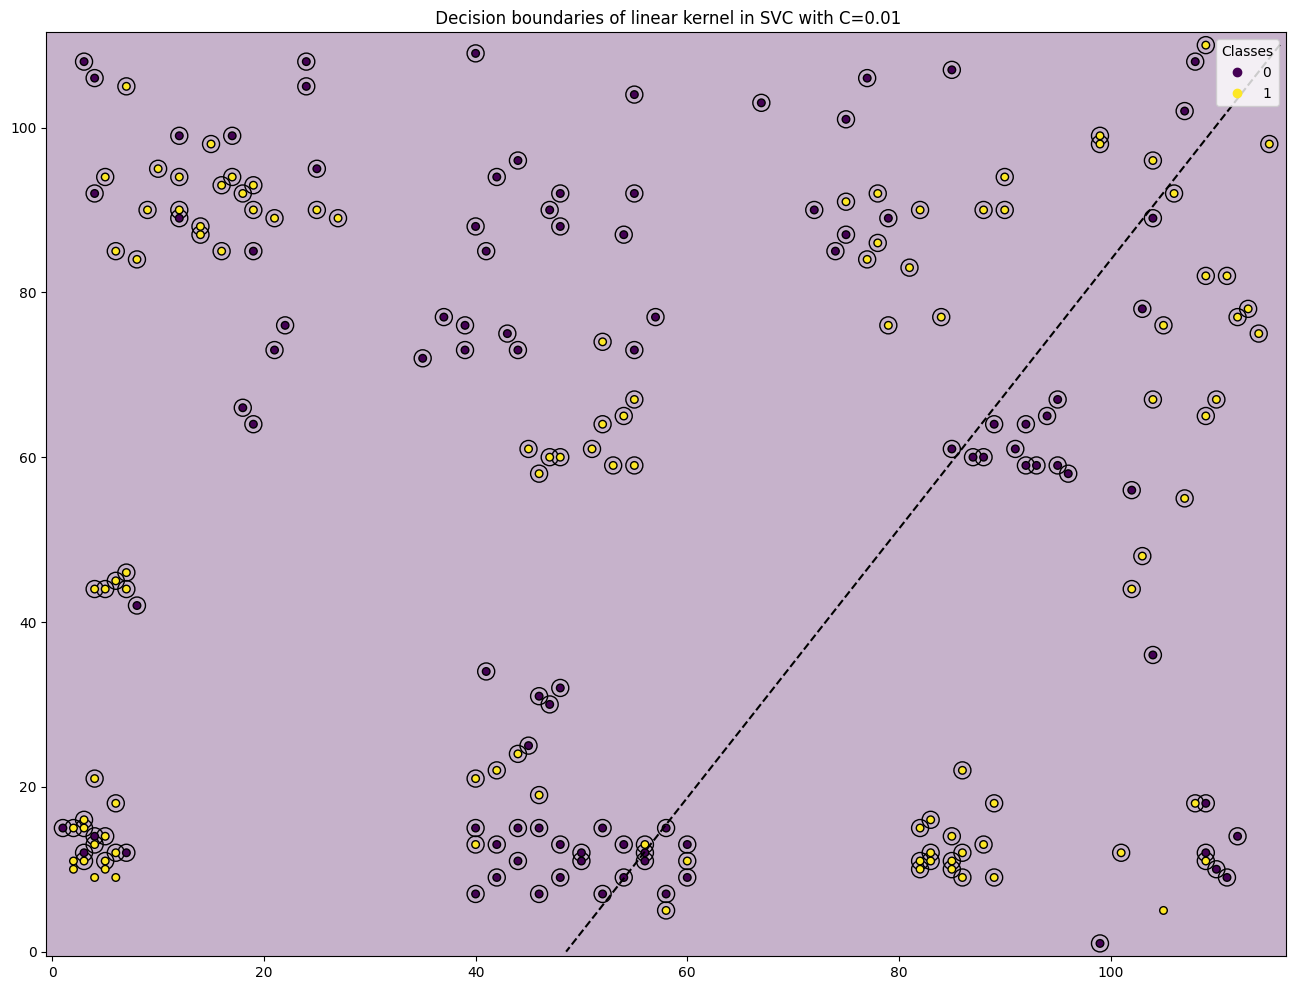

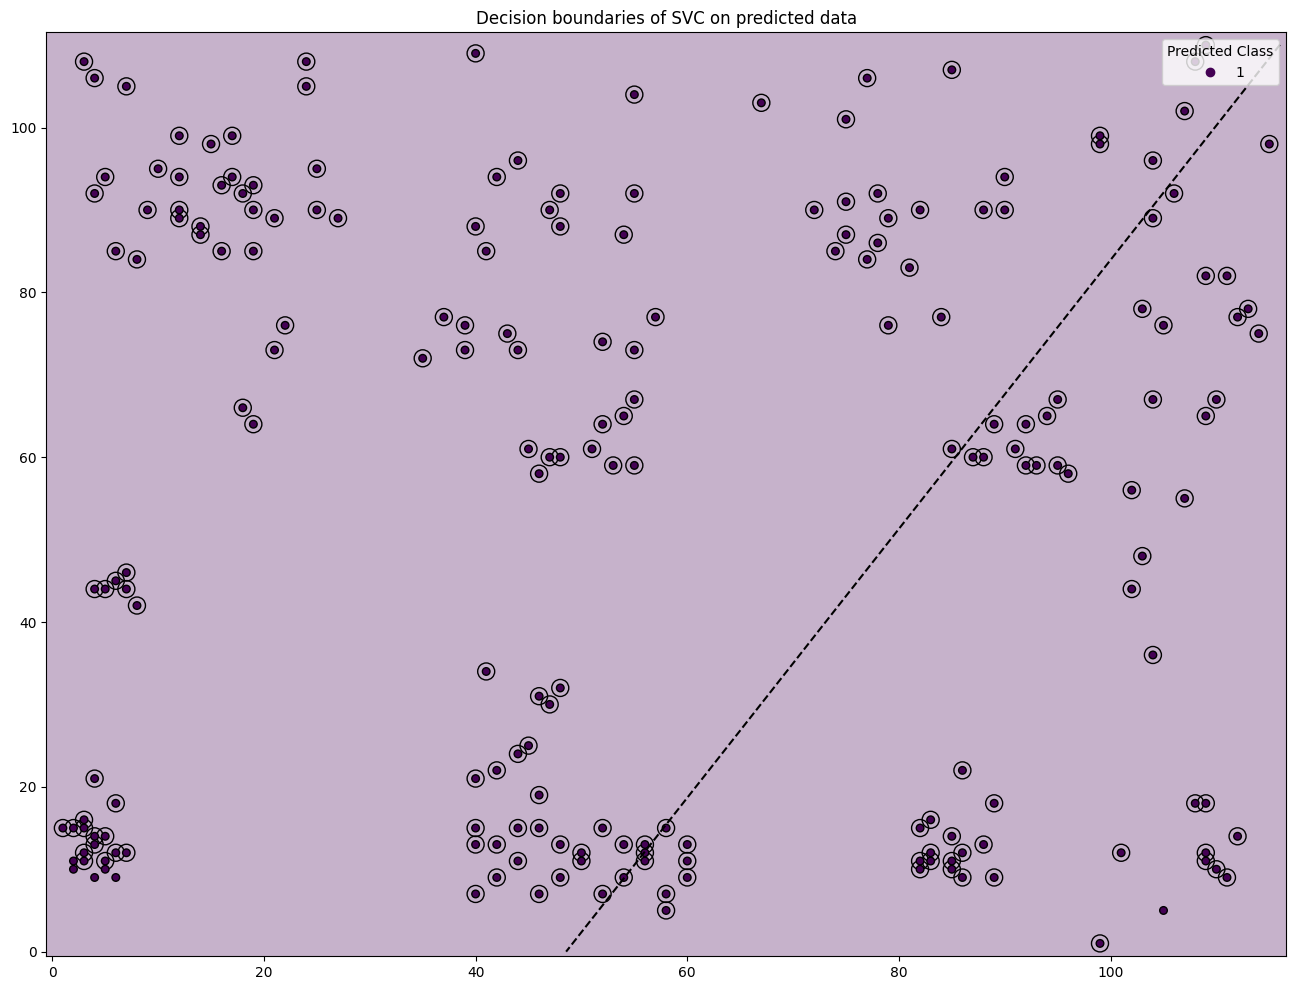

In [20]:
# fit a svm model
from sklearn import svm

C_values = [0.01, 1.0, 100.0]
X = df[['X', 'Y']].values
y = df['class'].values

C = 0.01
model = plot_training_data_with_decision_boundary(
    kernel="linear", X=X, y=y, C=C
)
# predict and evaluate
plot_prediction_data_with_decision_boundary(
    model, X
)
print(f"(*) Evaluation for C={C}:")
evaluate_model(model, df)
print("\n")


(*) Evaluation for C=1.0:
[[  0  97]
 [  0 107]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.52      1.00      0.69       107

    accuracy                           0.52       204
   macro avg       0.26      0.50      0.34       204
weighted avg       0.28      0.52      0.36       204





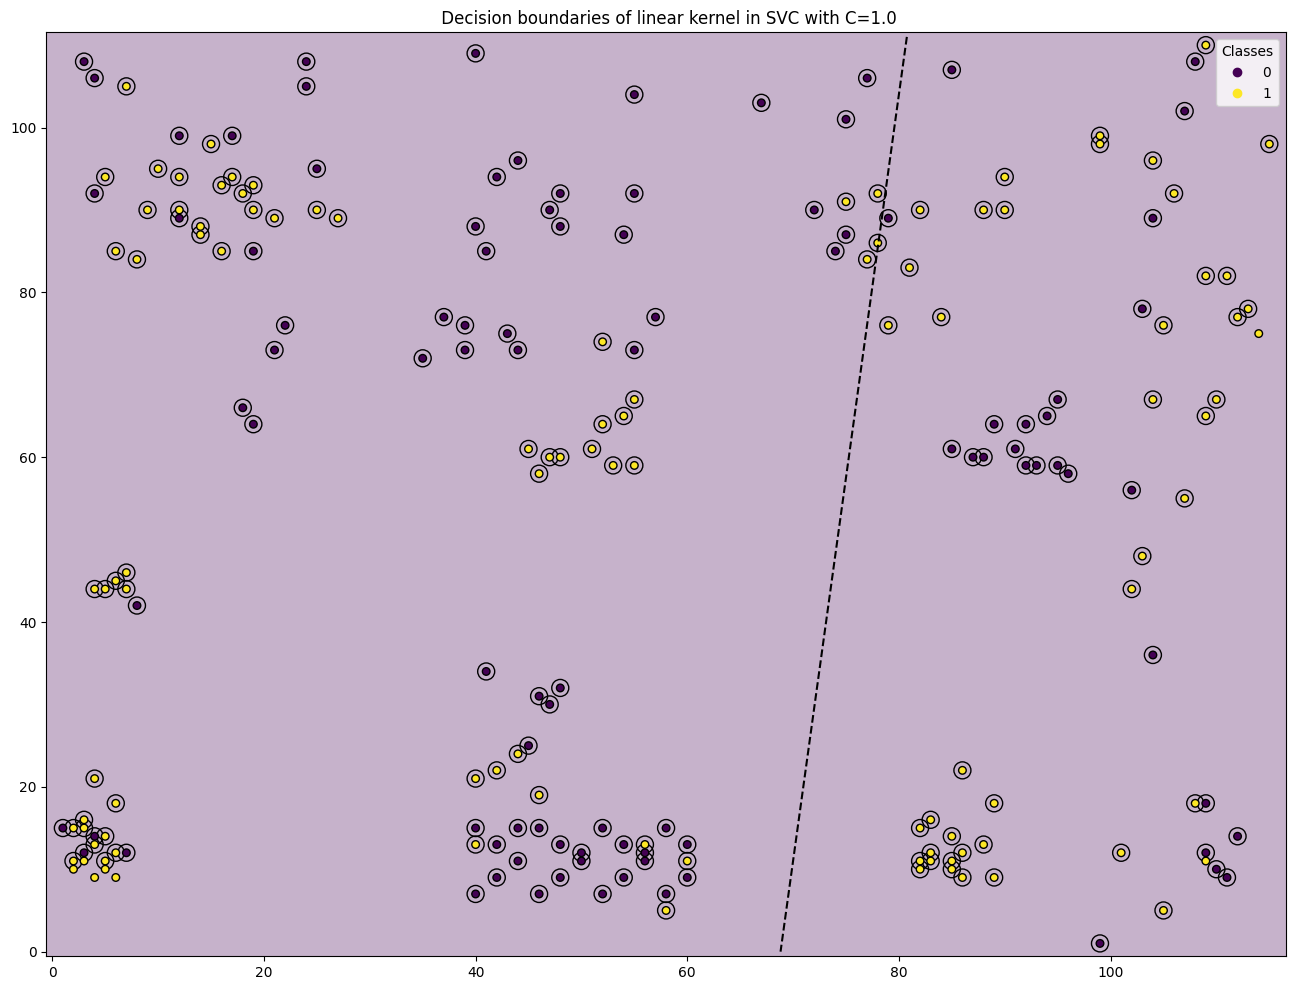

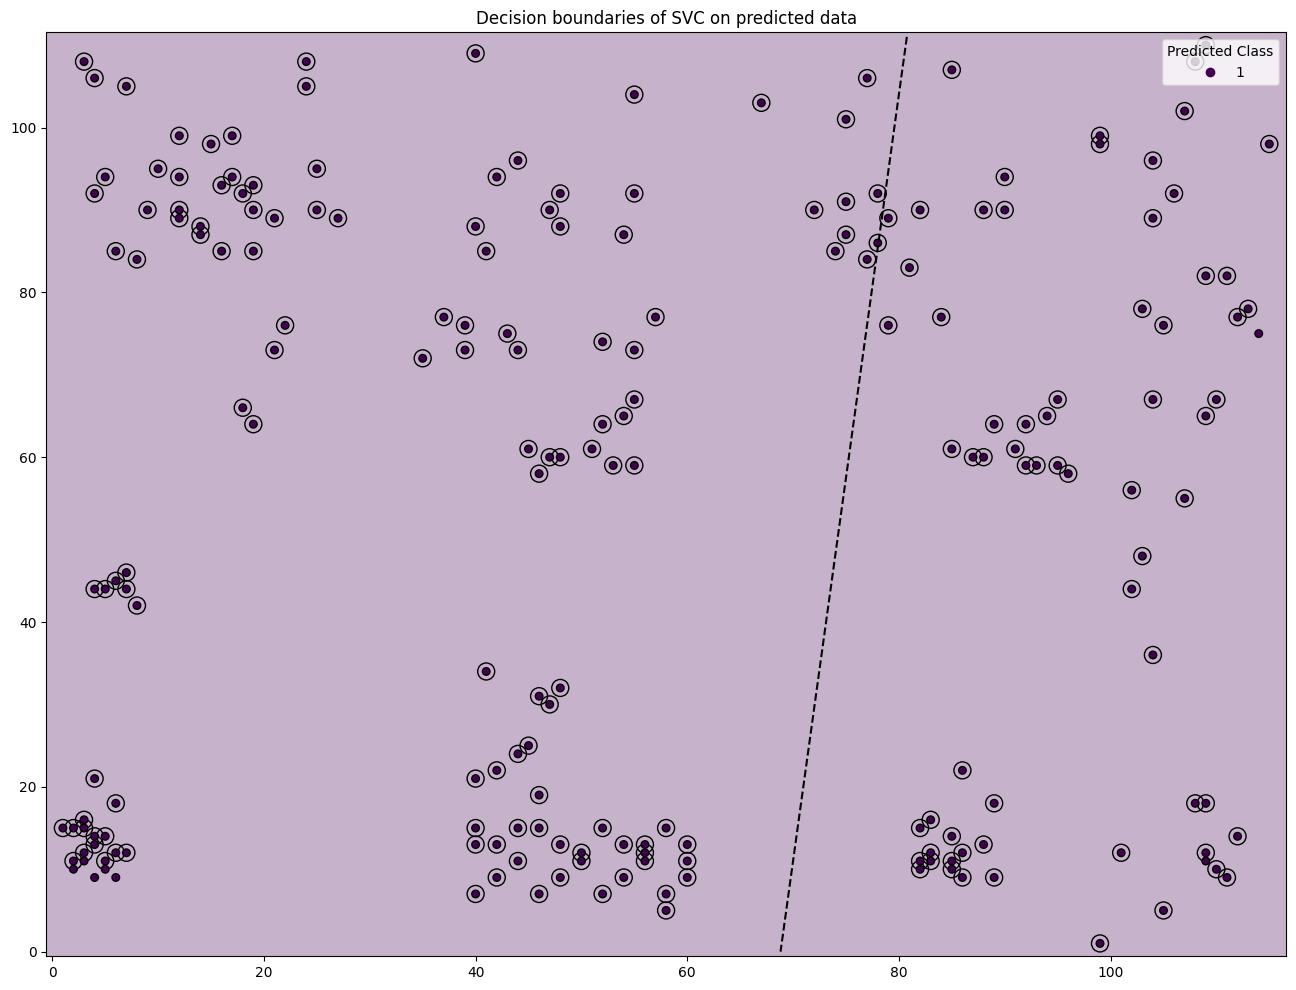

In [21]:
C = 1.0
model = plot_training_data_with_decision_boundary(
    kernel="linear", X=X, y=y, C=C
)
# predict and evaluate
plot_prediction_data_with_decision_boundary(
    model, X
)
print(f"(*) Evaluation for C={C}:")
evaluate_model(model, df)
print("\n")


(*) Evaluation for C=100.0:
[[  0  97]
 [  0 107]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.52      1.00      0.69       107

    accuracy                           0.52       204
   macro avg       0.26      0.50      0.34       204
weighted avg       0.28      0.52      0.36       204





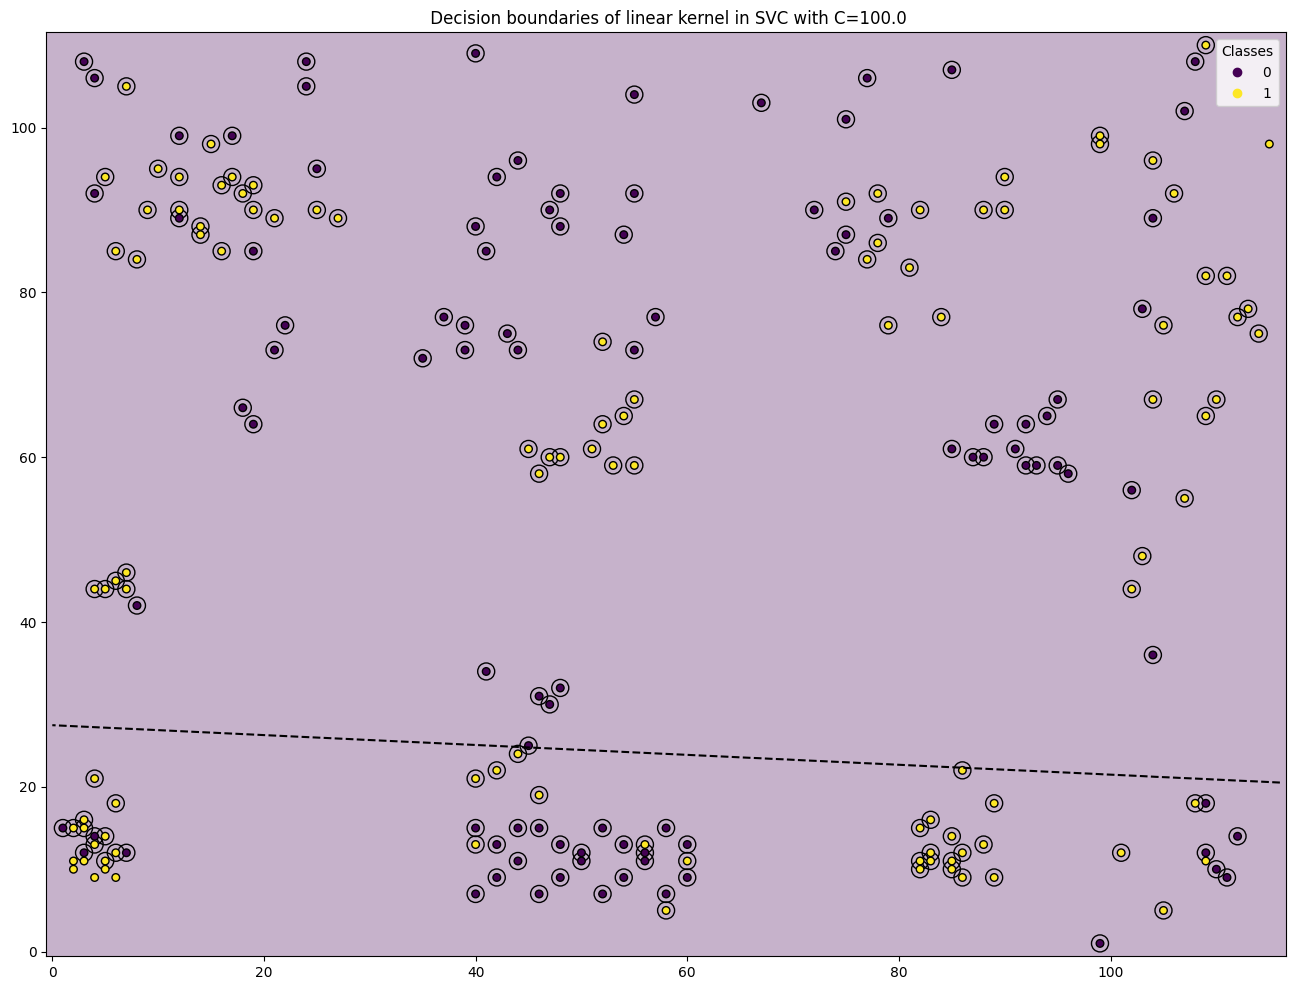

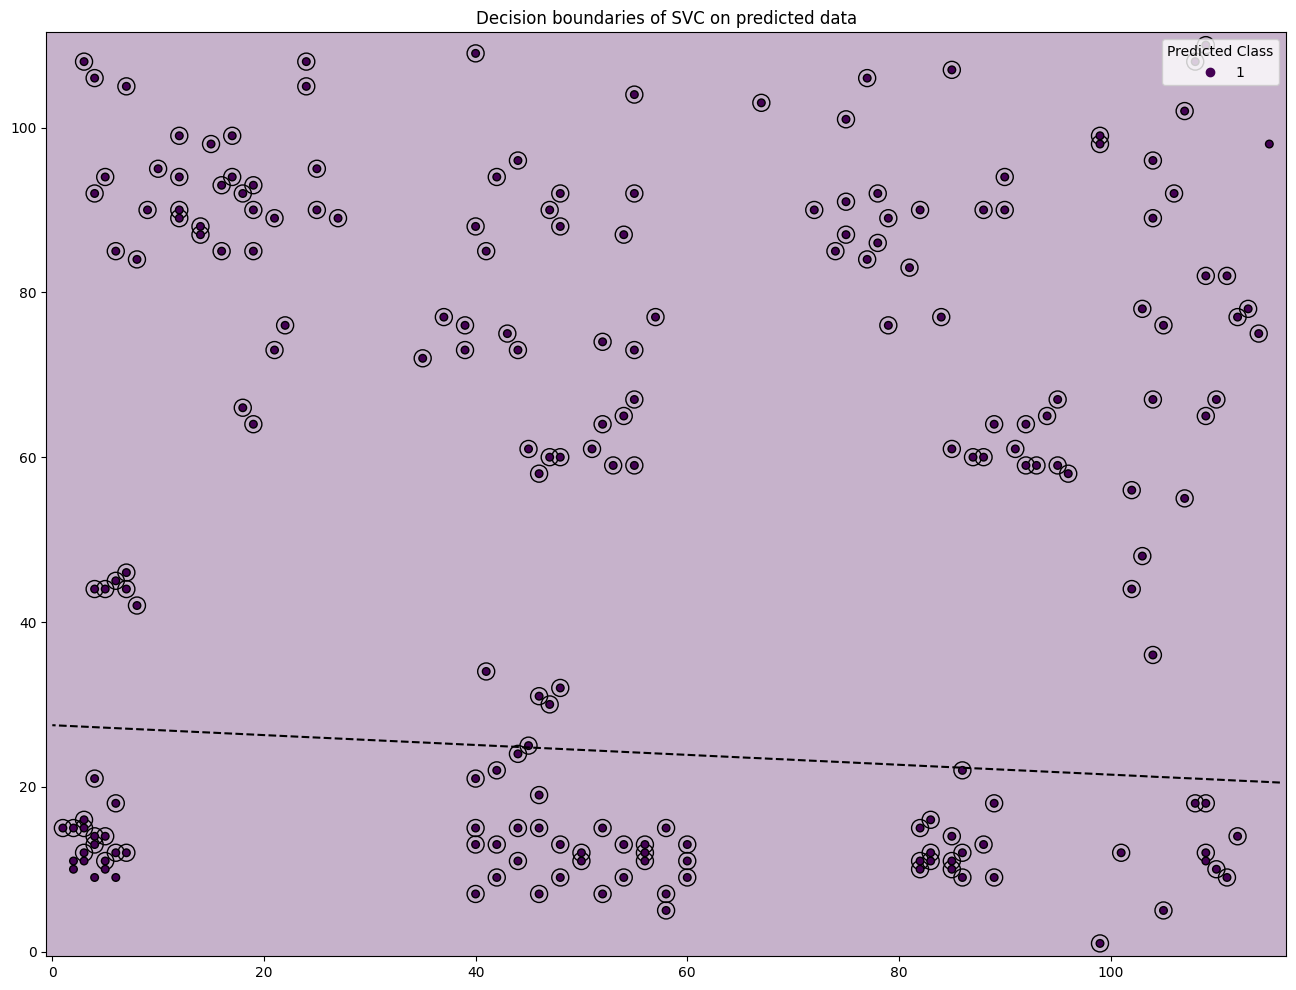

In [22]:
C = 100.0
model = plot_training_data_with_decision_boundary(
    kernel="linear", X=X, y=y, C=C
)
# predict and evaluate
plot_prediction_data_with_decision_boundary(
    model, X
)
print(f"(*) Evaluation for C={C}:")
evaluate_model(model, df)
print("\n")


## Fitting with nonlinear SVM

(*) Evaluation for C=0.01:
[[  0  97]
 [  0 107]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.52      1.00      0.69       107

    accuracy                           0.52       204
   macro avg       0.26      0.50      0.34       204
weighted avg       0.28      0.52      0.36       204





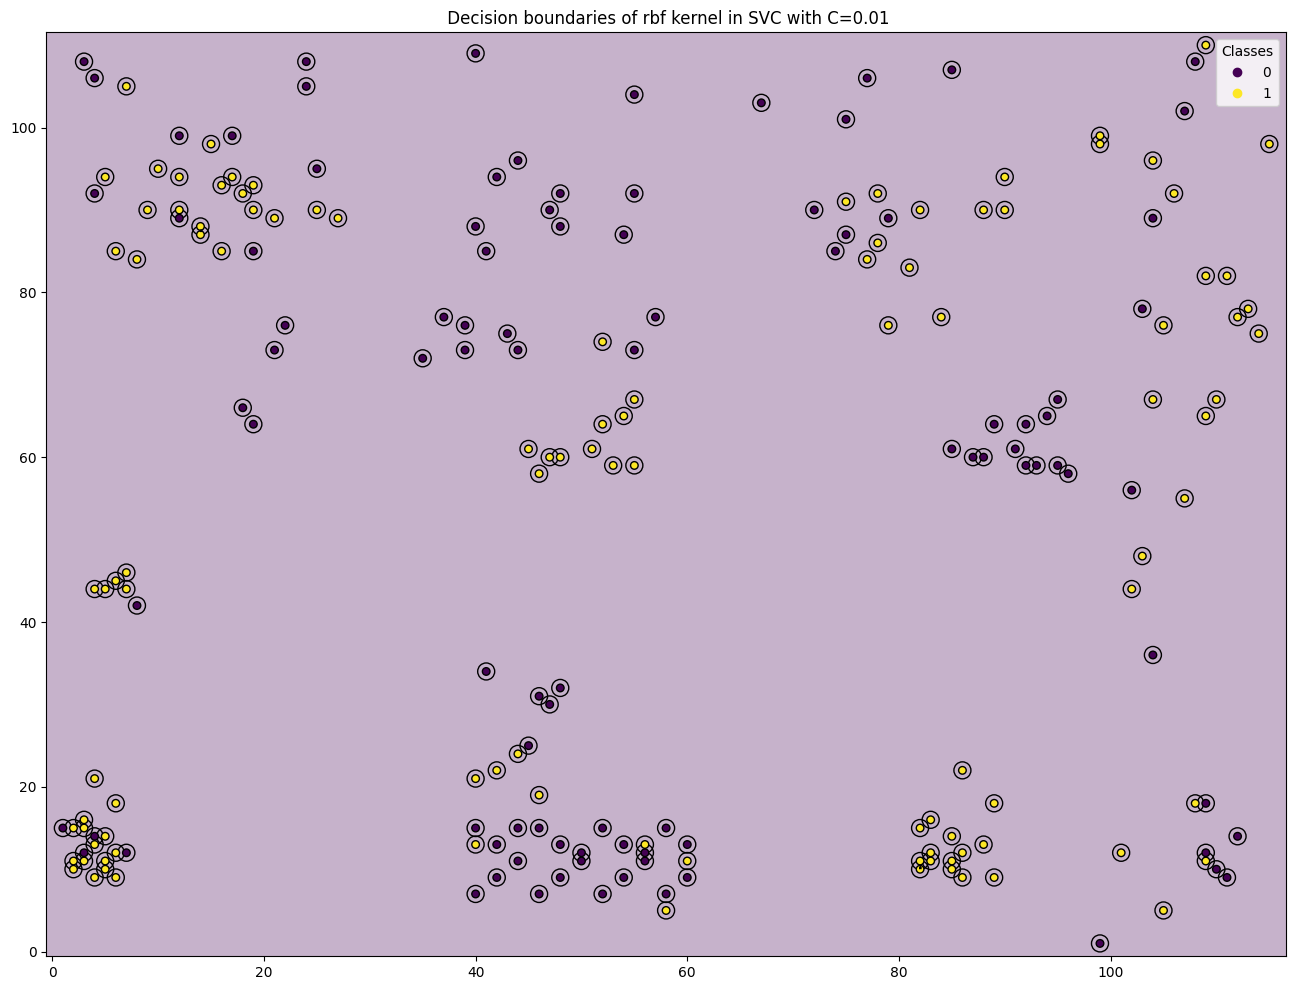

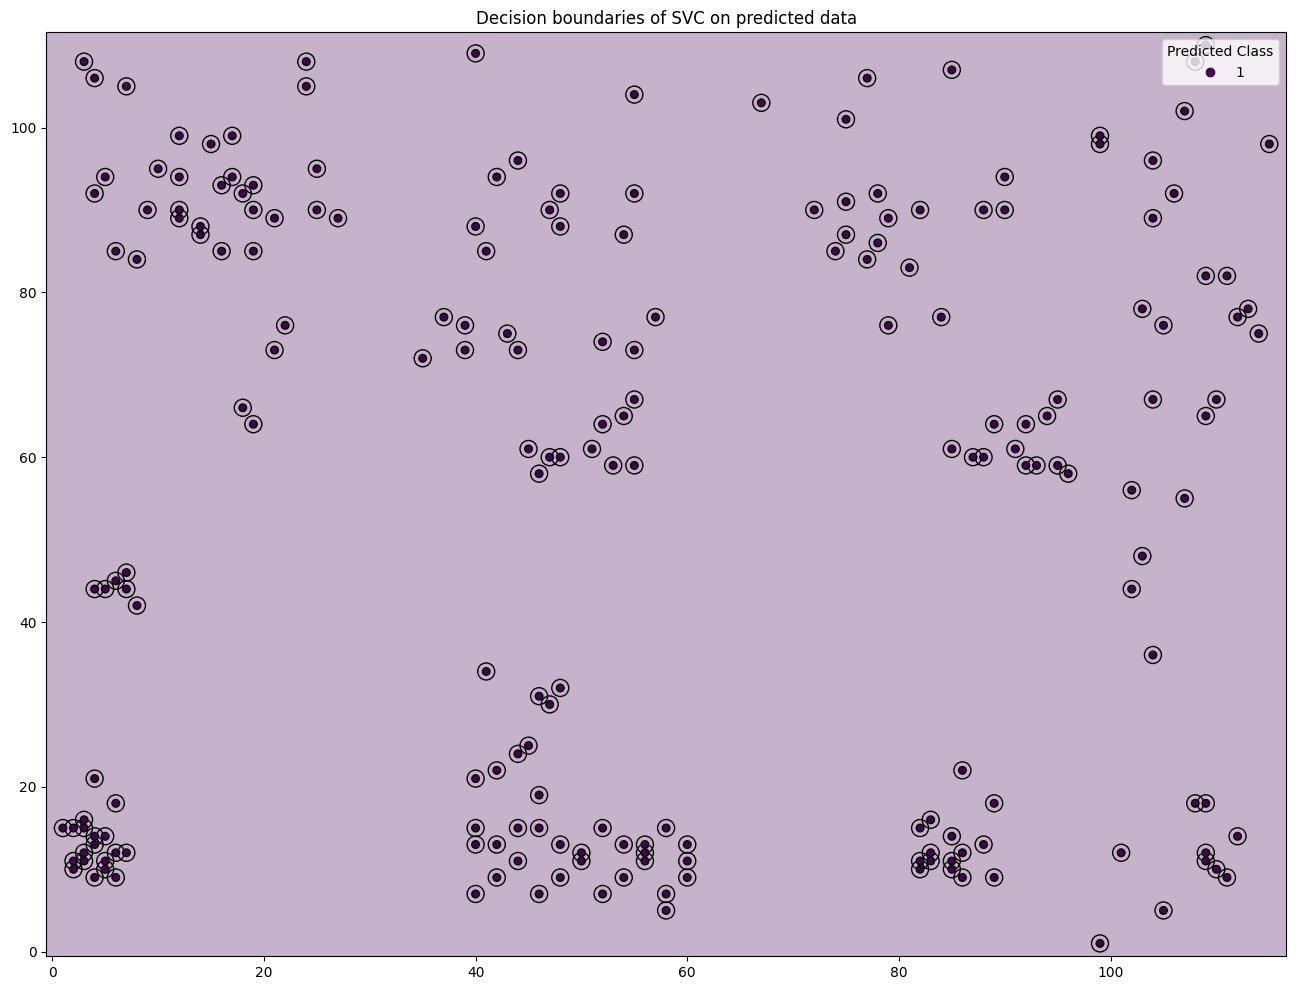

In [23]:
C = 0.01
model = plot_training_data_with_decision_boundary(
    kernel="rbf", X=X, y=y, C=C
)
# predict and evaluate
plot_prediction_data_with_decision_boundary(
    model, X
)
print(f"(*) Evaluation for C={C}:")
evaluate_model(model, df)
print("\n")

(*) Evaluation for C=1.0:
[[ 97   0]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       107

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204





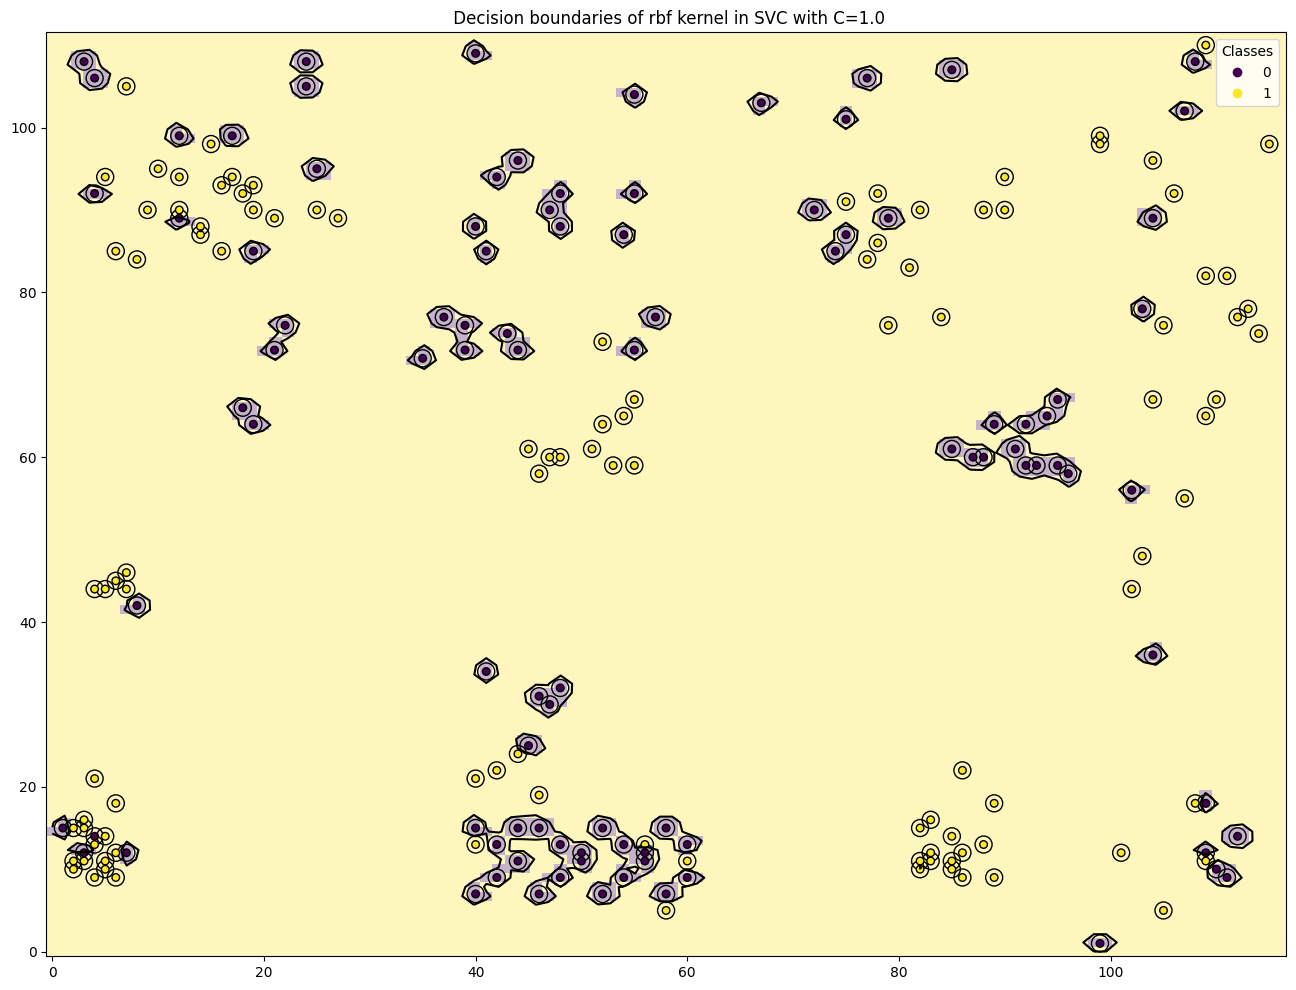

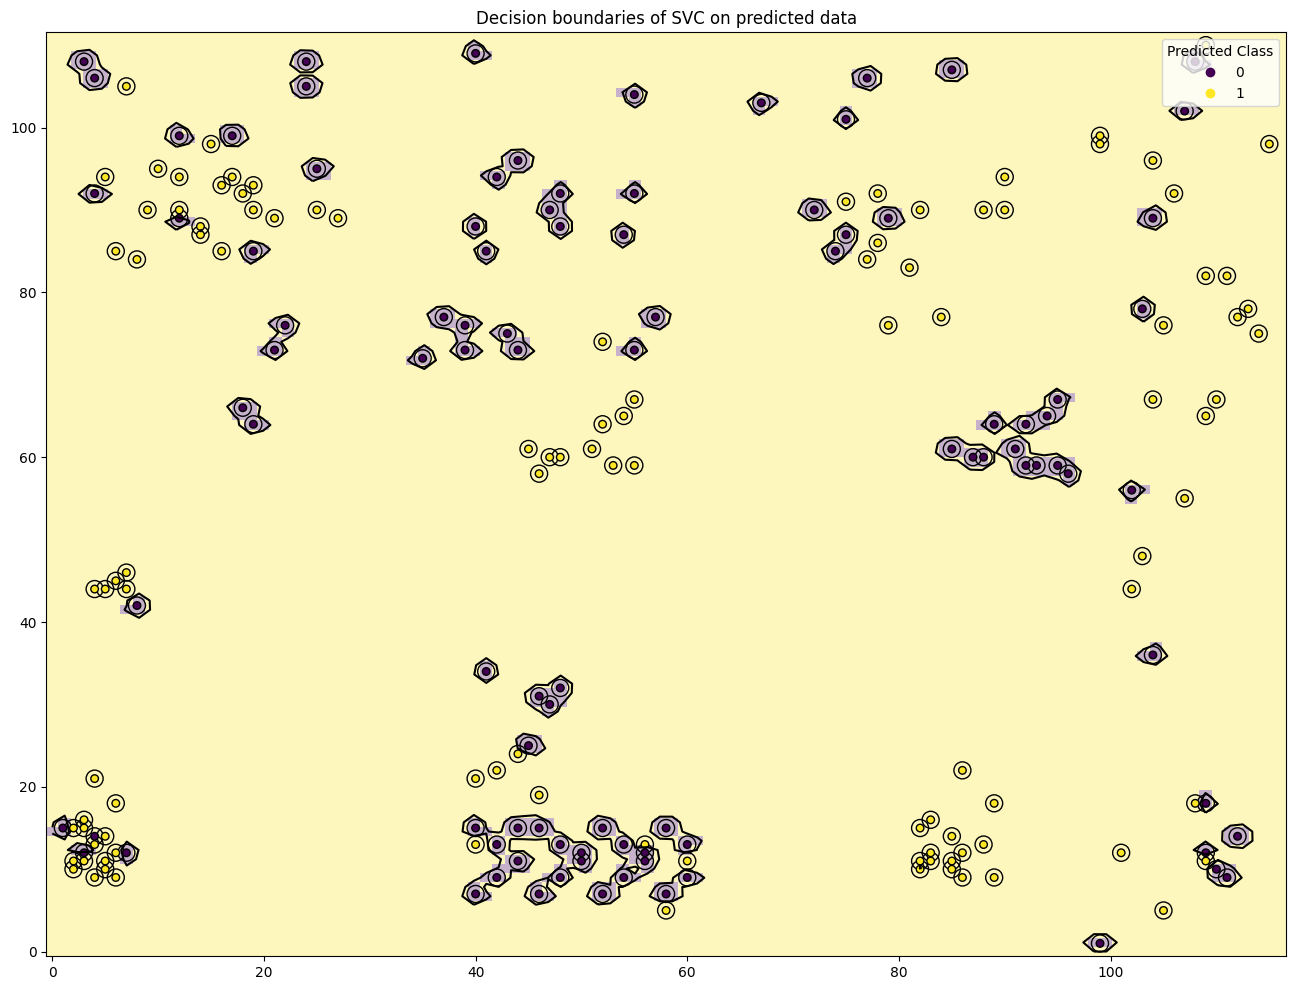

In [24]:
C = 1.0
model = plot_training_data_with_decision_boundary(
    kernel="rbf", X=X, y=y, C=C
)
# predict and evaluate
plot_prediction_data_with_decision_boundary(
    model, X
)
print(f"(*) Evaluation for C={C}:")
evaluate_model(model, df)
print("\n")

(*) Evaluation for C=100.0:
[[ 97   0]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       107

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204





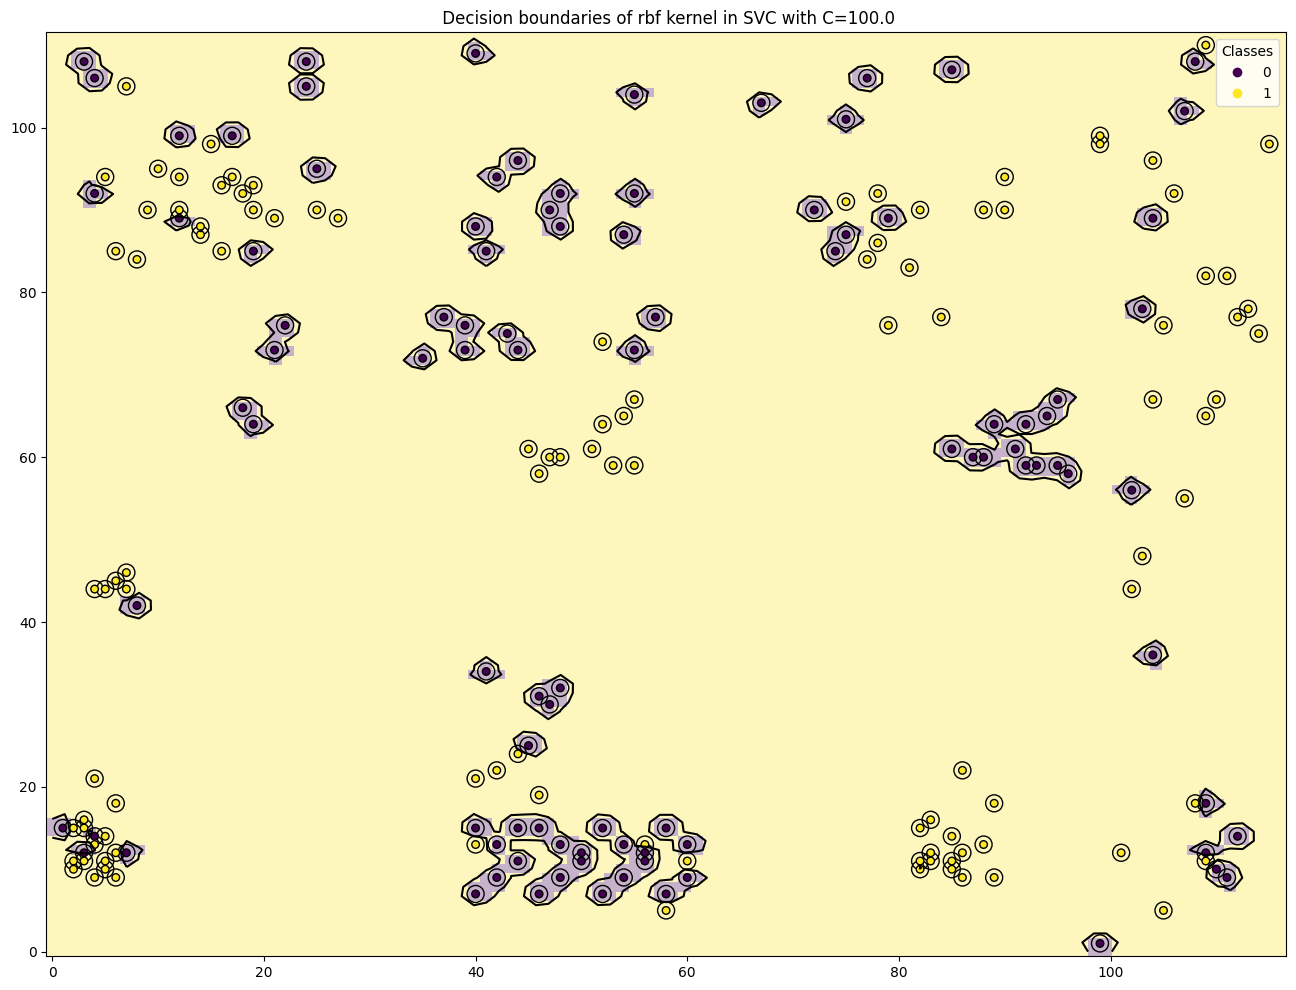

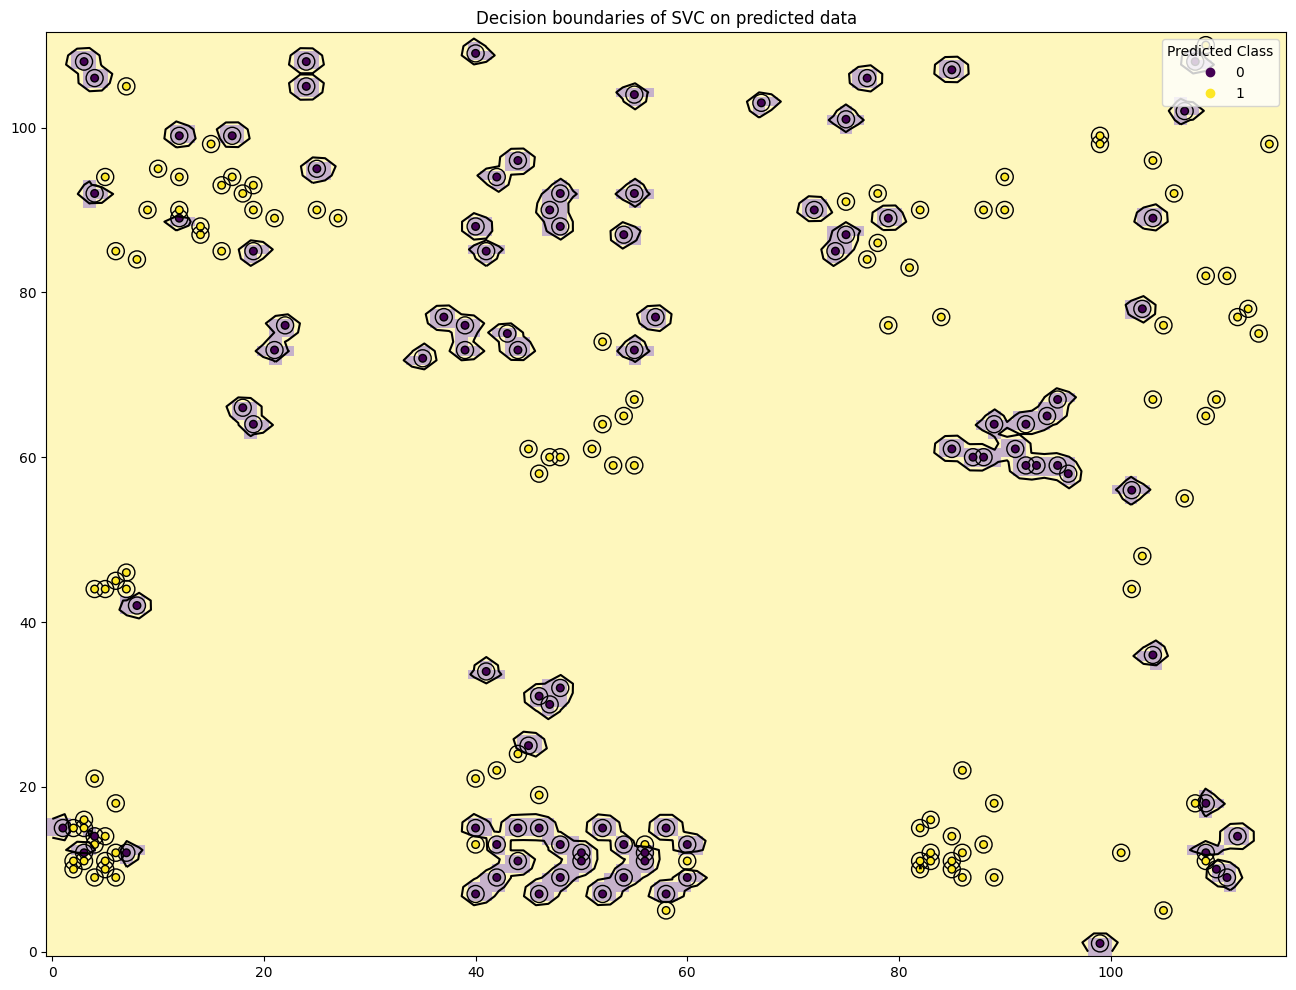

In [25]:
C = 100.0
model = plot_training_data_with_decision_boundary(
    kernel="rbf", X=X, y=y, C=C
)
# predict and evaluate
plot_prediction_data_with_decision_boundary(
    model, X
)
print(f"(*) Evaluation for C={C}:")
evaluate_model(model, df)
print("\n")

# K Means Clustering

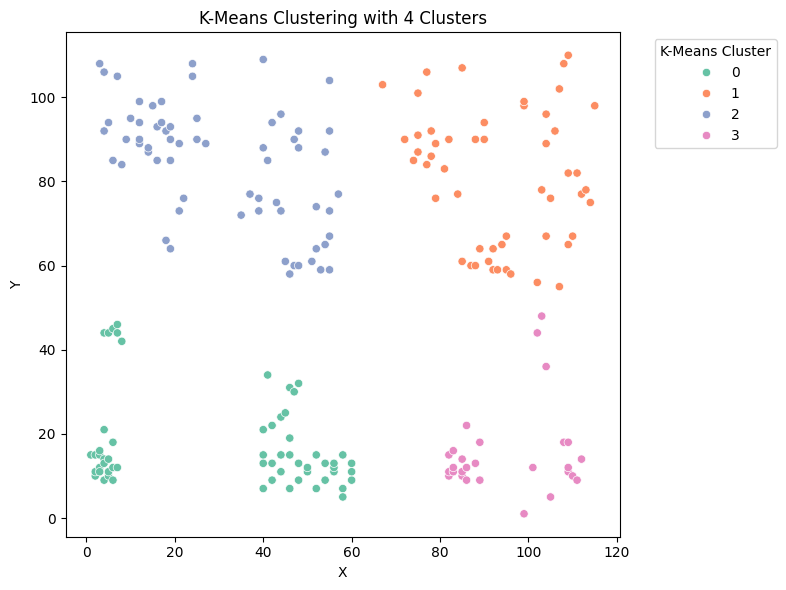

,Cluster,SSE
0,0,37454.233333
1,1,22185.134615
2,2,31916.218750
3,3,6504.107143
4,Total,98059.693842


In [26]:
kmeans_4_cluster = KMeans(n_clusters=4, random_state=42).fit(X)
df['kmeans_cluster'] = kmeans_4_cluster.labels_
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='X', y='Y', hue='kmeans_cluster', palette='Set2', ax=ax)
ax.set_title('K-Means Clustering with 4 Clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(title='K-Means Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Get cluster centers and labels
centers = kmeans_4_cluster.cluster_centers_
labels = kmeans_4_cluster.labels_

# Calculate SSE per cluster
sse_per_cluster = []
for i in range(kmeans_4_cluster.n_clusters):
    cluster_points = X[labels == i]
    center = centers[i]
    sse = np.sum((cluster_points - center) ** 2)
    sse_per_cluster.append(sse)

# Total SSE (same as KMeans.inertia_)
total_sse = np.sum(sse_per_cluster)

# Display results
sse_df = pd.DataFrame({
    "Cluster": range(kmeans_4_cluster.n_clusters),
    "SSE": sse_per_cluster
})
sse_df.loc[len(sse_df.index)] = ["Total", total_sse]
display(sse_df)

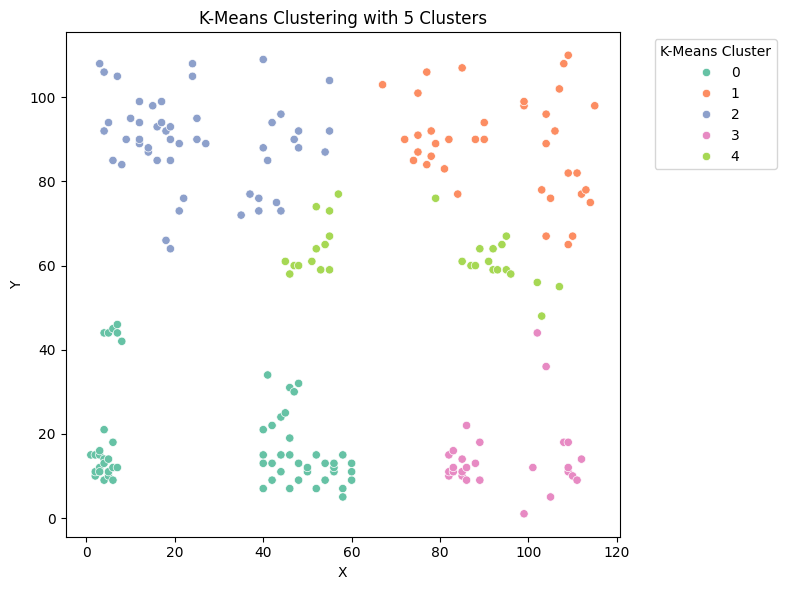

,Cluster,SSE
0,0,37454.233333
1,1,13288.108108
2,2,17378.549020
3,3,5332.740741
4,4,14388.068966
5,Total,87841.700167


In [27]:
kmeans_5_cluster = KMeans(n_clusters=5, random_state=42).fit(X)
df['kmeans_cluster'] = kmeans_5_cluster.labels_
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='X', y='Y', hue='kmeans_cluster', palette='Set2', ax=ax)
ax.set_title('K-Means Clustering with 5 Clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(title='K-Means Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Get cluster centers and labels
centers = kmeans_5_cluster.cluster_centers_
labels = kmeans_5_cluster.labels_

# Calculate SSE per cluster
sse_per_cluster = []
for i in range(kmeans_5_cluster.n_clusters):
    cluster_points = X[labels == i]
    center = centers[i]
    sse = np.sum((cluster_points - center) ** 2)
    sse_per_cluster.append(sse)

# Total SSE (same as KMeans.inertia_)
total_sse = np.sum(sse_per_cluster)

# Display results
sse_df = pd.DataFrame({
    "Cluster": range(kmeans_5_cluster.n_clusters),
    "SSE": sse_per_cluster
})
sse_df.loc[len(sse_df.index)] = ["Total", total_sse]
display(sse_df)

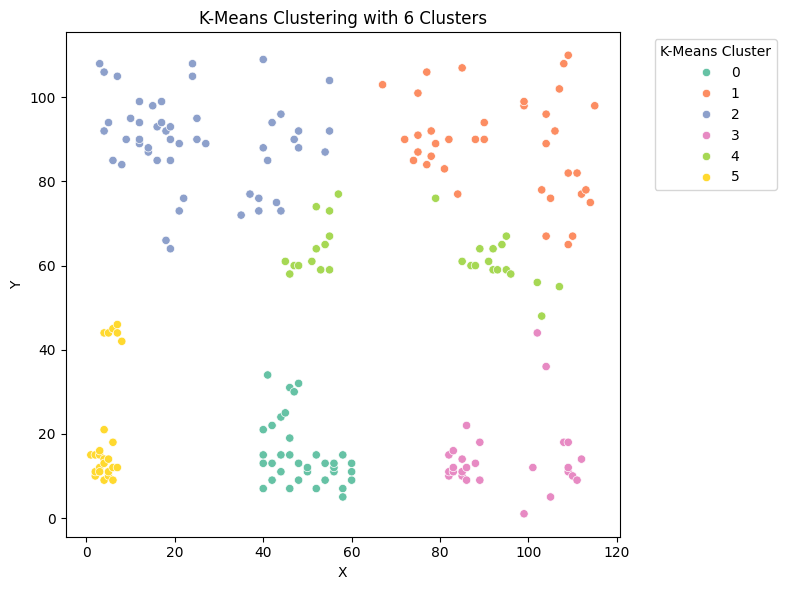

,Cluster,SSE
0,0,3510.628571
1,1,13288.108108
2,2,17378.549020
3,3,5332.740741
4,4,14388.068966
5,5,4682.480000
6,Total,58580.575405


In [ ]:
kmeans_6_cluster = KMeans(n_clusters=6, random_state=42).fit(X)
df['kmeans_cluster'] = kmeans_6_cluster.labels_
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='X', y='Y', hue='kmeans_cluster', palette='Set2', ax=ax)
ax.set_title('K-Means Clustering with 6 Clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(title='K-Means Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Get cluster centers and labels
centers = kmeans_6_cluster.cluster_centers_
labels = kmeans_6_cluster.labels_

# Calculate SSE per cluster
sse_per_cluster = []
for i in range(kmeans_6_cluster.n_clusters):
    cluster_points = X[labels == i]
    center = centers[i]
    sse = np.sum((cluster_points - center) ** 2)
    sse_per_cluster.append(sse)

# Total SSE (same as KMeans.inertia_)
total_sse = np.sum(sse_per_cluster)

# Display results
sse_df = pd.DataFrame({
    "Cluster": range(kmeans_6_cluster.n_clusters),
    "SSE": sse_per_cluster
})
sse_df.loc[len(sse_df.index)] = ["Total", total_sse]
display(sse_df)